Reference - 


- [Time Series in R Session 1.1 (Basic Objects and Commands)](https://youtu.be/QHsmAM6nktY?list=PLNiBe_9WsBK_s_dHORITHpkU8v28c7oLG)
- [Time Series in R Session 1.2 (Correlation)](https://www.youtube.com/watch?v=-ImppGbVpXI)
- [Time Series in R Session 1.3 (Forecasting)](https://www.youtube.com/watch?v=vypp3nXbEPE)
- [Time Series in R Session 1.4 (Stochastic Models)](https://www.youtube.com/watch?v=Gy7IlQu5AXs)
- [Time Series in R Session 1.5 (Regression)](https://www.youtube.com/watch?v=8HbFJN-0Ii0)
- [Time Series in R Session 1.6 (Stationary and Non-Stationary Models)](https://www.youtube.com/watch?v=ga85Ci4VAus)



- https://github.com/gwd999/R-stuff/tree/master/Introductory%20TS%20with%20R


In [4]:
data(AirPassengers)

In [5]:
AirPassengers

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

In [6]:
AP = AirPassengers

In [7]:
class(AP)

[1] "ts"

In [8]:
start(AP)

[1] 1949    1

In [9]:
end(AP)

[1] 1960   12

In [10]:
frequency(AP)

[1] 12

In [11]:
summary(AP)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

In [12]:
require(repr)

Loading required package: repr


In [13]:
options(repr.plot.width = 6)
options(repr.plot.height = 4)

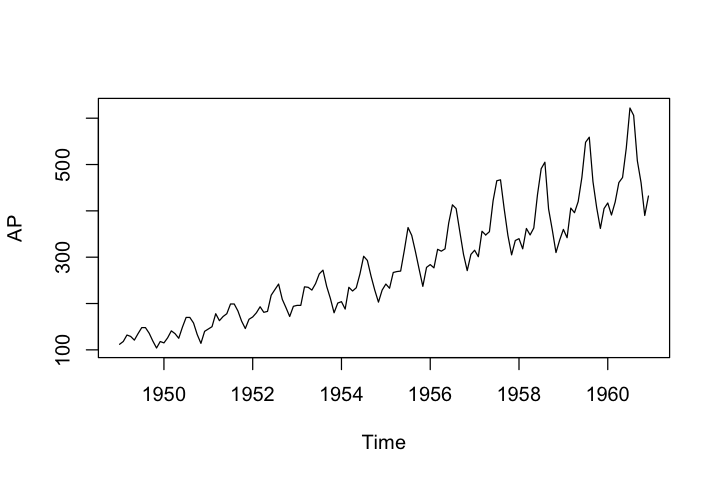

In [14]:
plot(AP)

In [15]:
cycle(AP)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949   1   2   3   4   5   6   7   8   9  10  11  12
1950   1   2   3   4   5   6   7   8   9  10  11  12
1951   1   2   3   4   5   6   7   8   9  10  11  12
1952   1   2   3   4   5   6   7   8   9  10  11  12
1953   1   2   3   4   5   6   7   8   9  10  11  12
1954   1   2   3   4   5   6   7   8   9  10  11  12
1955   1   2   3   4   5   6   7   8   9  10  11  12
1956   1   2   3   4   5   6   7   8   9  10  11  12
1957   1   2   3   4   5   6   7   8   9  10  11  12
1958   1   2   3   4   5   6   7   8   9  10  11  12
1959   1   2   3   4   5   6   7   8   9  10  11  12
1960   1   2   3   4   5   6   7   8   9  10  11  12

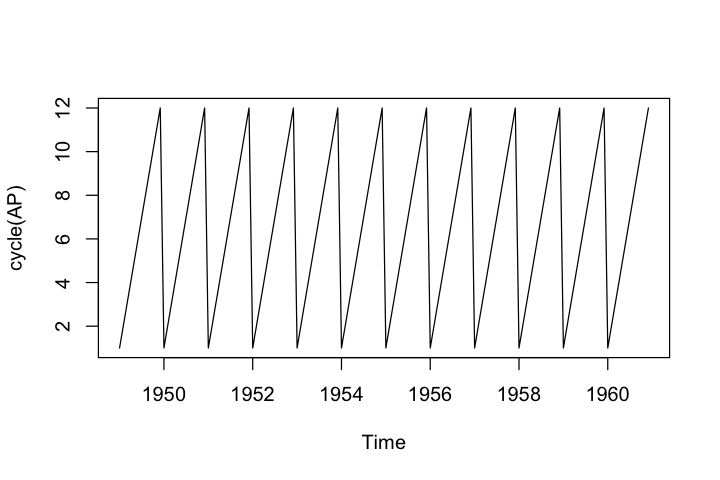

In [16]:
plot(cycle(AP))

In [17]:
aggregate(AP)
## Gives us yearly totals

Time Series:
Start = 1949 
End = 1960 
Frequency = 1 
 [1] 1520 1676 2042 2364 2700 2867 3408 3939 4421 4572 5140 5714

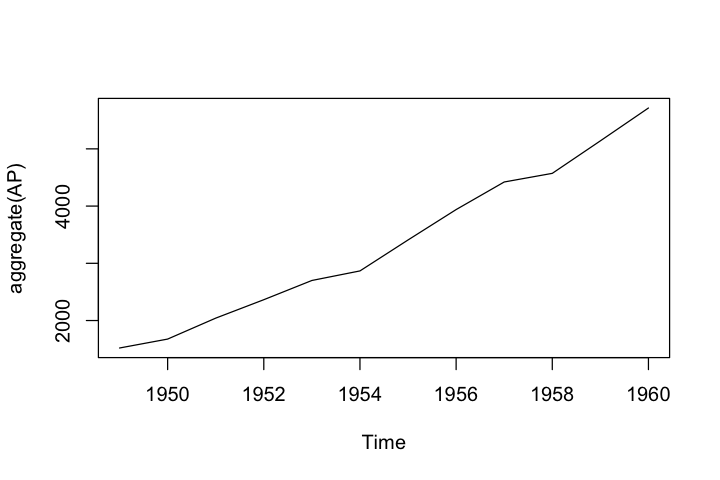

In [18]:
plot(aggregate(AP))

In [19]:
aggregate(AP, FUN = mean)

Time Series:
Start = 1949 
End = 1960 
Frequency = 1 
 [1] 126.6667 139.6667 170.1667 197.0000 225.0000 238.9167 284.0000 328.2500
 [9] 368.4167 381.0000 428.3333 476.1667

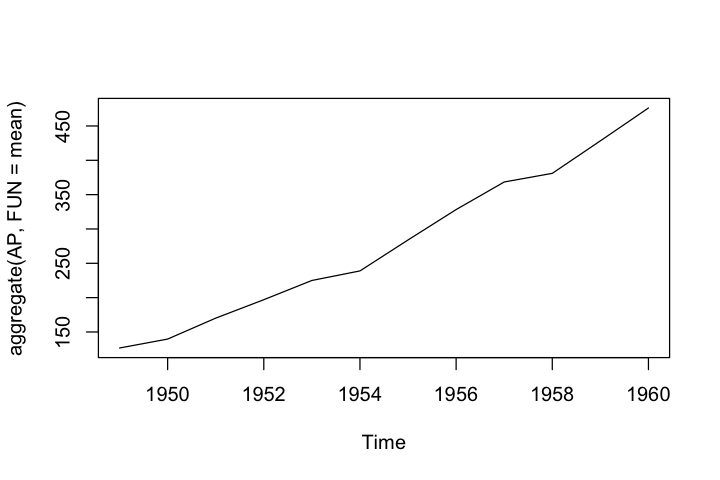

In [20]:
plot(aggregate(AP, FUN = mean))

Plot by the cycle, gives us the monthly variation

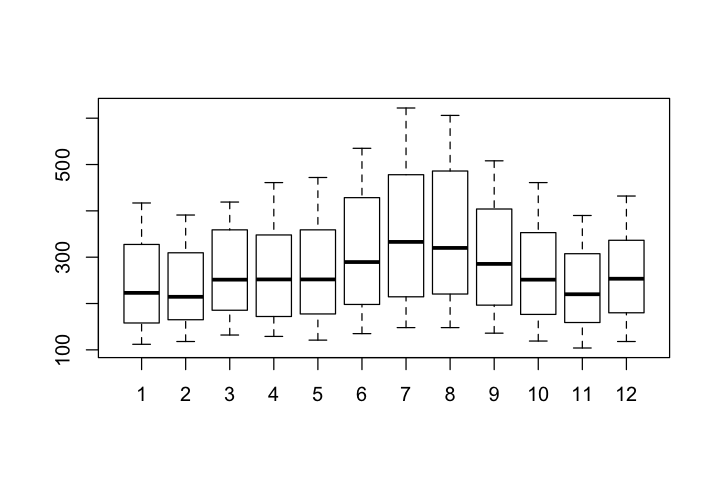

In [21]:
boxplot(AP ~ cycle(AP))

Box plot of entire dataset

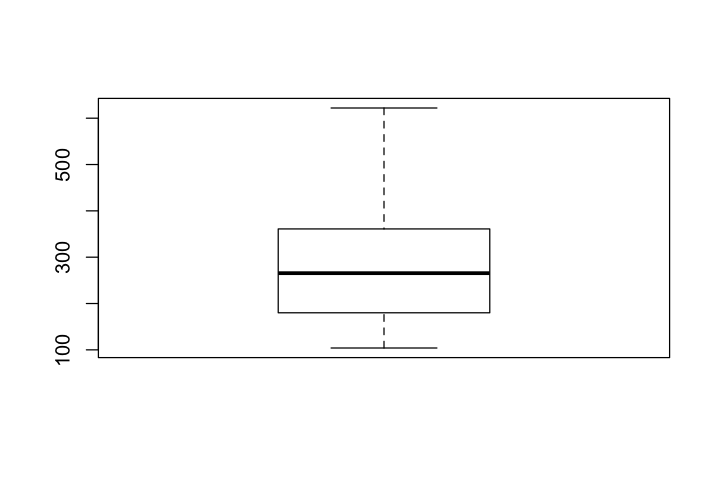

In [22]:
boxplot(AP)

In [23]:
webdata = "http://rci.rutgers.edu/~rwomack/UNRATE.csv"  # Unemployment Rate 
webdata2 = "http://rci.rutgers.edu/~rwomack/CPIAUCSL.csv" # Inflation Rate

In [24]:
Unemployment = read.csv(webdata, row.names=1)
Inflation = read.csv(webdata2, row.names=1)

In [25]:
head(Unemployment)

,VALUE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4
1948-04-01,3.9
1948-05-01,3.5
1948-06-01,3.6


In [26]:
head(Inflation)

,VALUE
1948-01-01,10.24
1948-02-01,9.48
1948-03-01,6.82
1948-04-01,8.27
1948-05-01,9.38
1948-06-01,9.38


In [27]:
class(Unemployment)

[1] "data.frame"

In [28]:
Urate = ts(Unemployment$VALUE, start=c(1948, 1), freq = 12)
Irate = ts(Inflation$VALUE, start=c(1948, 1), freq = 12)

In [29]:
Urate.july = window(Urate, start= c(1980, 7), freq = TRUE) # Gets all July data
Urate.july

Time Series:
Start = 1980.5 
End = 2011.5 
Frequency = 1 
 [1] 7.8 7.2 9.8 9.4 7.5 7.4 7.0 6.1 5.4 5.2 5.5 6.8 7.7 6.9 6.1 5.7 5.5 4.9 4.5
[20] 4.3 4.0 4.6 5.8 6.2 5.5 5.0 4.7 4.7 5.8 9.5 9.5 9.1

In [30]:
options(width = 120)
time(Urate)
options(width = 80)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug      Sep      Oct      Nov      Dec
1948 1948.000 1948.083 1948.167 1948.250 1948.333 1948.417 1948.500 1948.583 1948.667 1948.750 1948.833 1948.917
1949 1949.000 1949.083 1949.167 1949.250 1949.333 1949.417 1949.500 1949.583 1949.667 1949.750 1949.833 1949.917
1950 1950.000 1950.083 1950.167 1950.250 1950.333 1950.417 1950.500 1950.583 1950.667 1950.750 1950.833 1950.917
1951 1951.000 1951.083 1951.167 1951.250 1951.333 1951.417 1951.500 1951.583 1951.667 1951.750 1951.833 1951.917
1952 1952.000 1952.083 1952.167 1952.250 1952.333 1952.417 1952.500 1952.583 1952.667 1952.750 1952.833 1952.917
1953 1953.000 1953.083 1953.167 1953.250 1953.333 1953.417 1953.500 1953.583 1953.667 1953.750 1953.833 1953.917
1954 1954.000 1954.083 1954.167 1954.250 1954.333 1954.417 1954.500 1954.583 1954.667 1954.750 1954.833 1954.917
1955 1955.000 1955.083 1955.167 1955.250 1955.333 1955.417 1955.500 1955.583 1955.667 1955.750 1

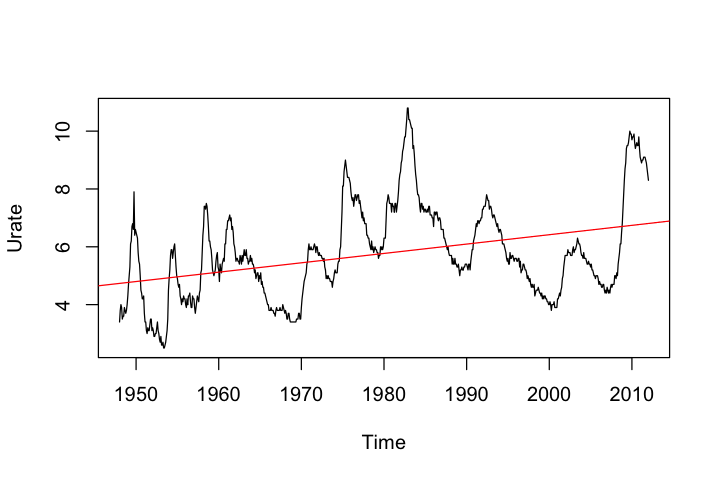

In [31]:
plot(Urate)
abline(reg = lm(Urate ~ time(Urate)), col = "red")

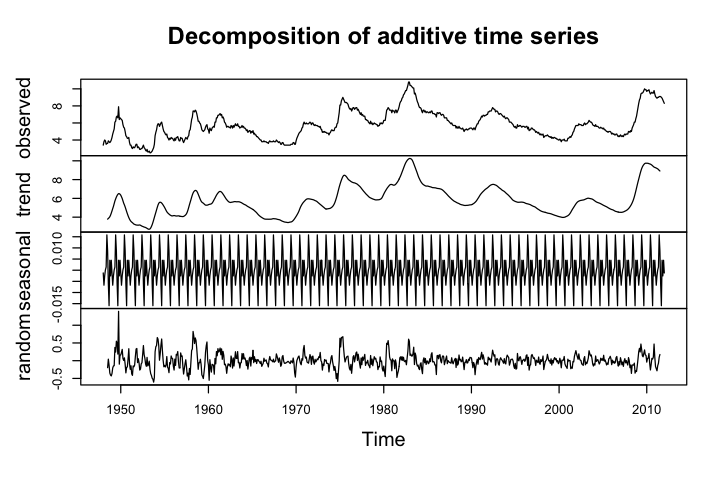

In [32]:
options(width = 120)
#decompose(Urate)
plot(decompose(Urate))

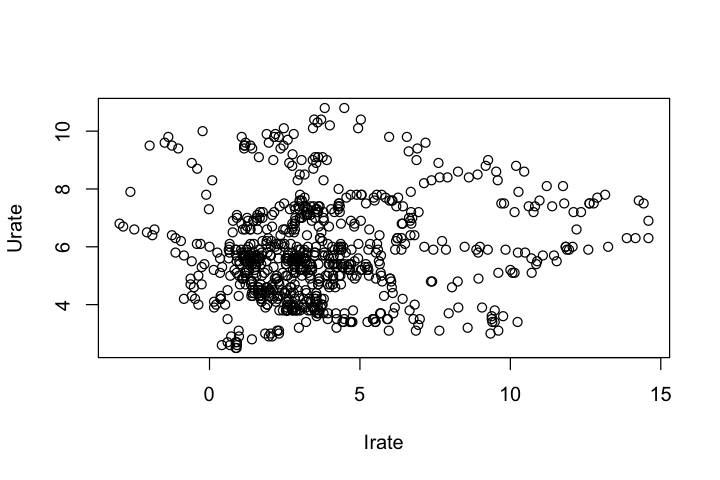

In [33]:
plot(Irate, Urate)

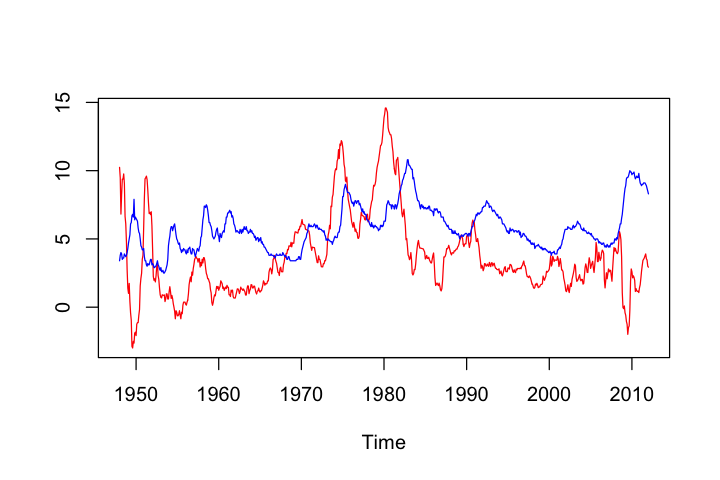

In [34]:
ts.plot(Irate, Urate, col=c("red", "blue"))

#### [Time Series in R Session 1.2 (Correlation)](https://www.youtube.com/watch?v=-ImppGbVpXI)


Analysis of time series

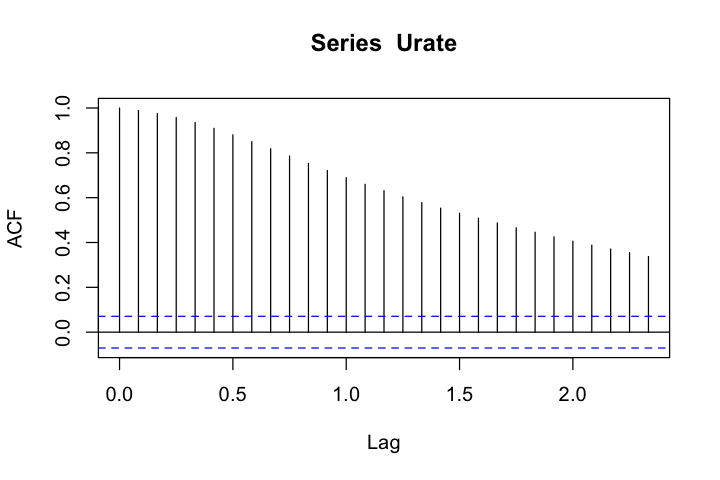

In [35]:
# Finds co-relation from one period to another.
acf(Urate) # Auto Correlation function

Interpret graph. 

1- at x = 0.5, y = 0.9 it means that after half year, 90% of the unemployment is correlated to (explained by) unemployment rate 6 months back. 

2- Blue lines are confidence intervals. Smaller bars mean that its not significantly different from zero. (no correlation) 

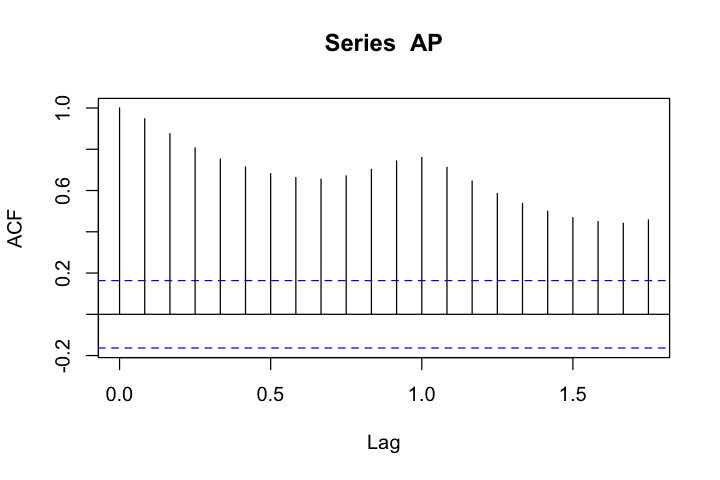

In [36]:
acf(AP)

Highly correlated data, and we see seasonality (bump at one year). Means air travel today is much more co-rrelated to air travel exactly one year ago than with the air travel 9 months ago or 15 months ago. 

----
Run autocorrelation on multiple time series

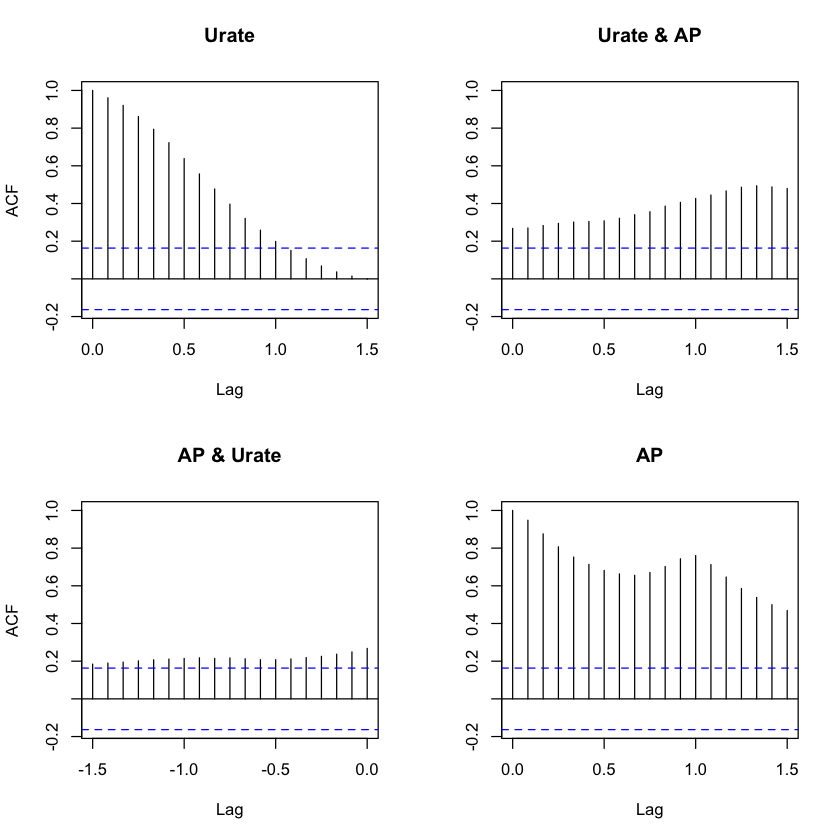

In [37]:
options(repr.plot.width = 7)
options(repr.plot.height = 7)
acf(ts.intersect(Urate, AP))

`ts.intersect` calculates time series intersection of two different time series

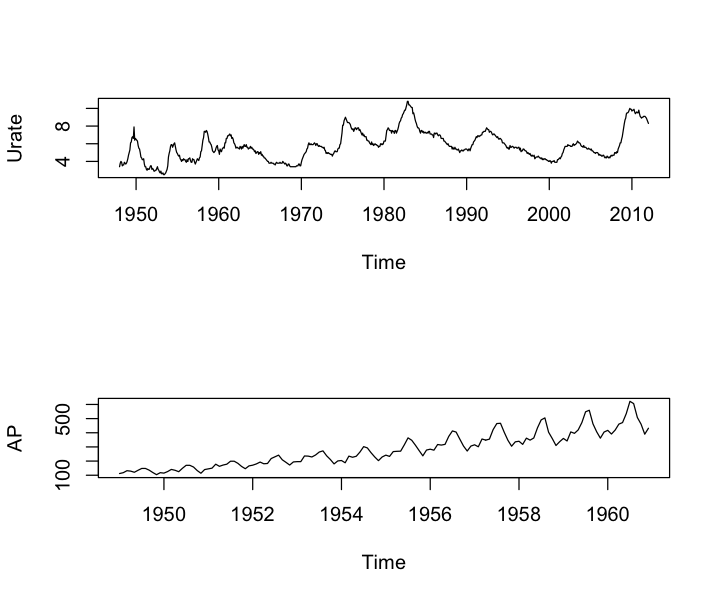

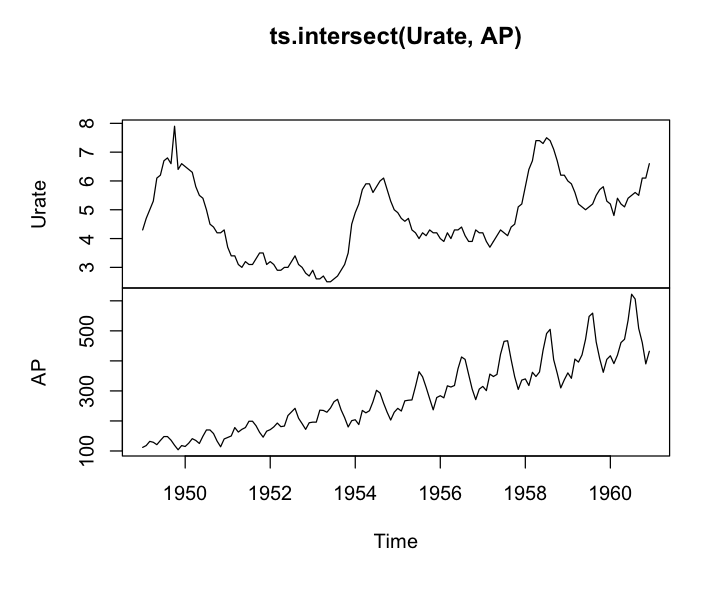

In [38]:
options(repr.plot.width = 6)
options(repr.plot.height = 5)
par(mfrow = c(2,1))
plot(Urate)
plot(AP)
plot(ts.intersect(Urate, AP))

In [39]:
head(ts.union(Urate, AP))

Urate,AP
3.4,NA
3.8,NA
4,NA
3.9,NA
3.5,NA
3.6,NA


#### [Time Series in R Session 1.3 (Forecasting)](https://www.youtube.com/watch?v=vypp3nXbEPE)

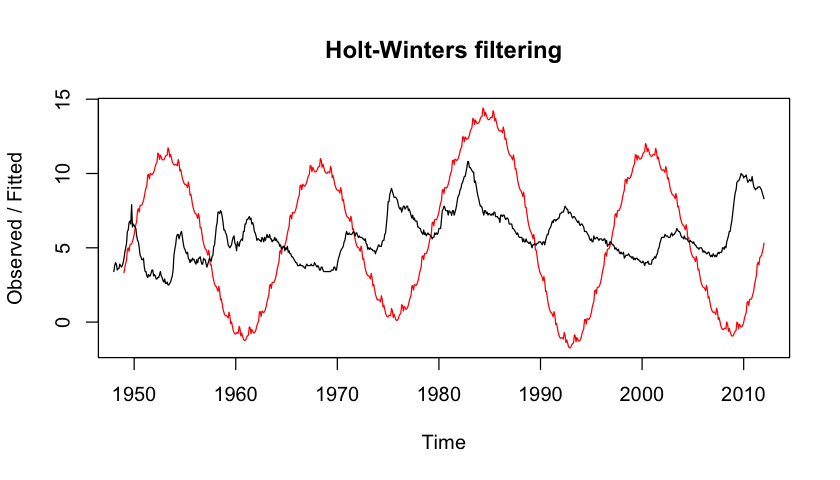

In [40]:
options(repr.plot.width = 7)
options(repr.plot.height = 4)
plot(HoltWinters(Urate, alpha =0.001 , beta =1 , gamma =0 ))

Black is actual data, Red is forecasted data

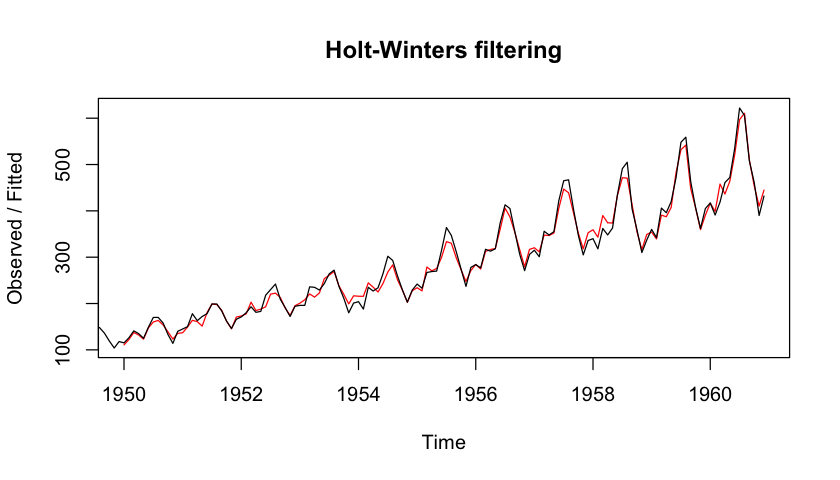

In [41]:
plot(HoltWinters(AP))

Better fit because more regular seasonal component and larger searsonal component.

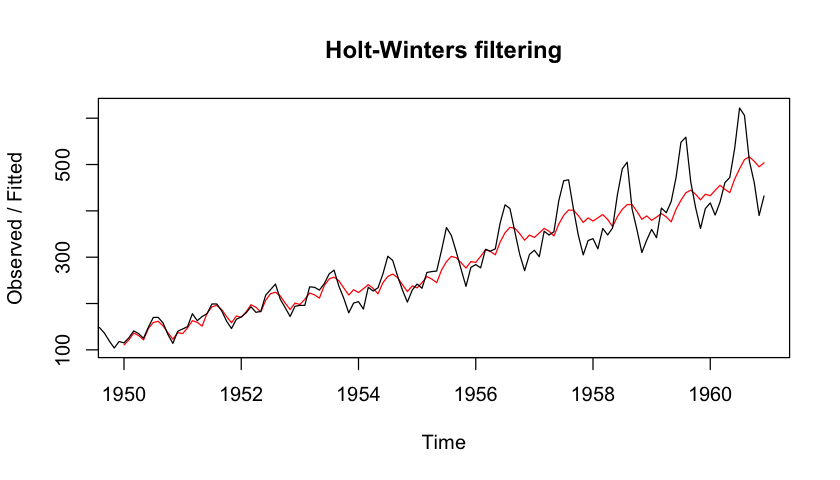

In [42]:
plot(HoltWinters(AP, alpha =0.1 , beta =0.2 , gamma =0 ))

Model looses its ability to handle large swings towards the end of the series.

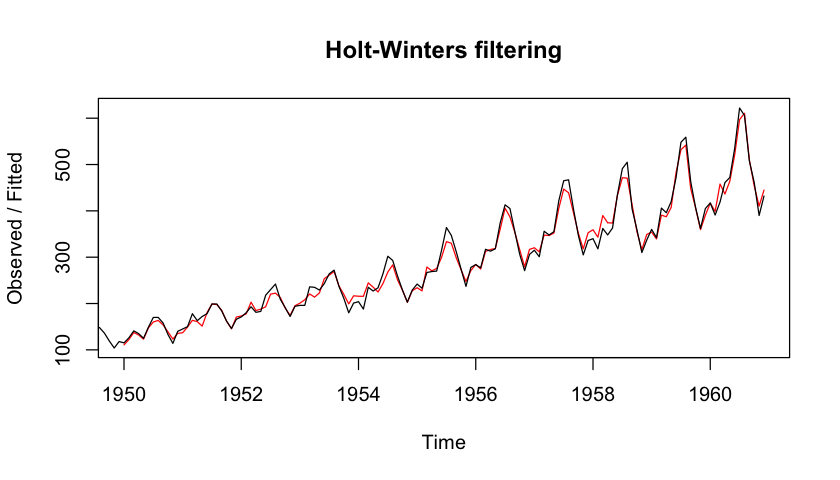

In [43]:
AP.hw = HoltWinters(AP)
plot(AP.hw)

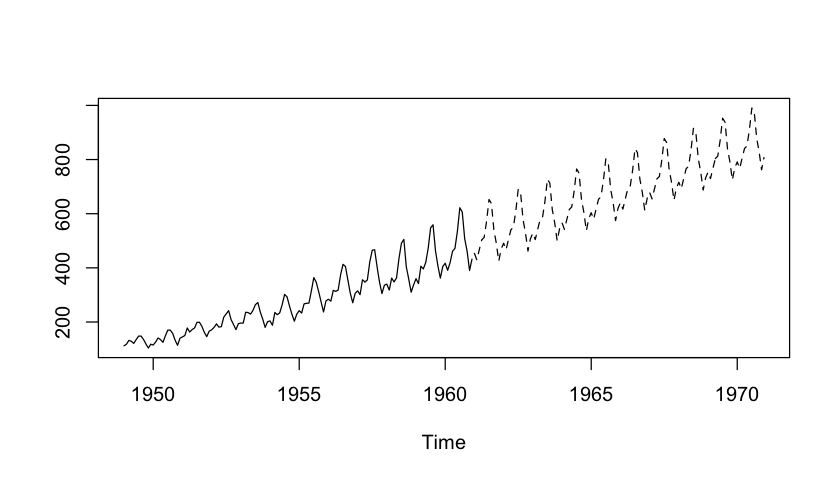

In [44]:
AP.predict = predict(AP.hw, n.ahead = 10* 12) # 10 years prediction 
ts.plot(AP, AP.predict, lty=1:2)

In [45]:
summary(AP.hw)

             Length Class  Mode     
fitted       528    mts    numeric  
x            144    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients  14    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           2    -none- call     

Gives us the number of observation and number of co-efficients that has been estimated.

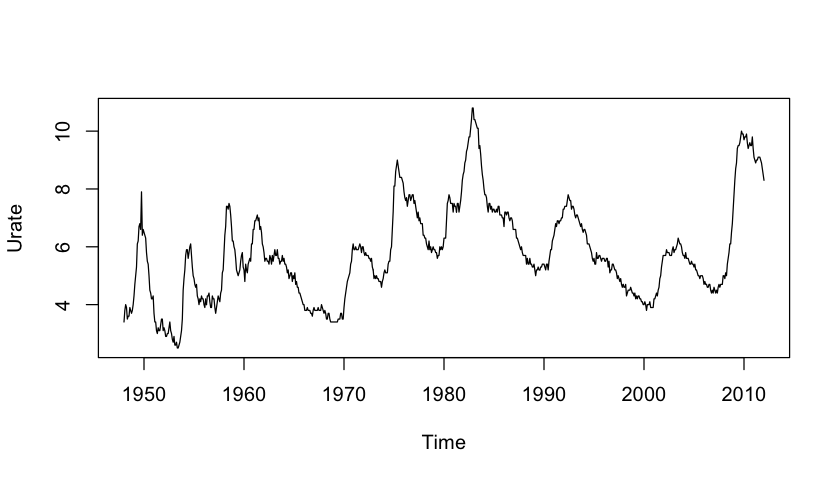

In [46]:
plot(Urate)

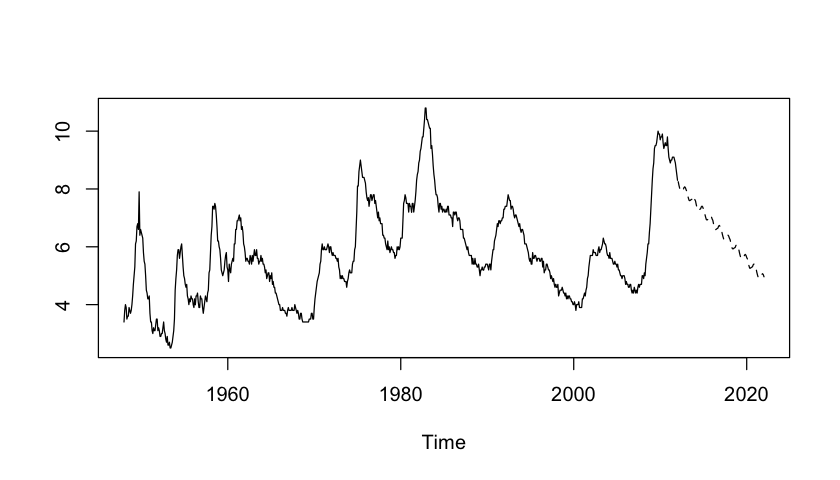

In [47]:
UR.hw = HoltWinters(Urate, seasonal="additive")
UR.predict = predict(UR.hw, n.ahead = 10*12)
ts.plot(Urate, UR.predict, lty=1:2)

#### [Time Series in R Session 1.4 (Stochastic Models)](https://www.youtube.com/watch?v=Gy7IlQu5AXs)

Randomwalk

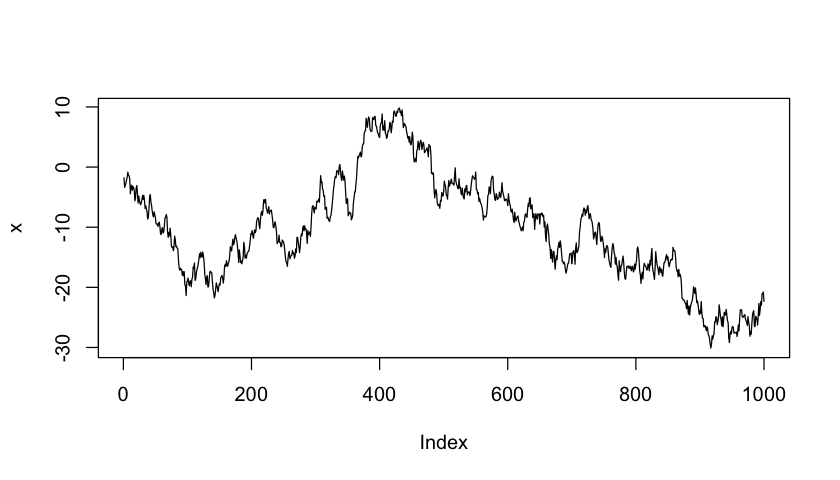

In [48]:
# Run again and again to see different / random nature of the graph
x = w = rnorm(1000)
for(t in 2:1000) x[t] = x[t-1] + w[t]
plot(x, type="l")

Compare persistance over time of this function using auto co-relation function 

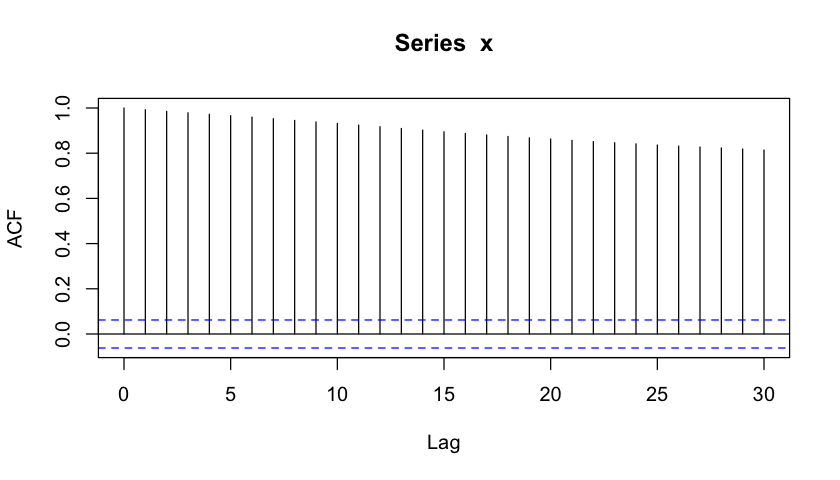

In [49]:
acf(x)

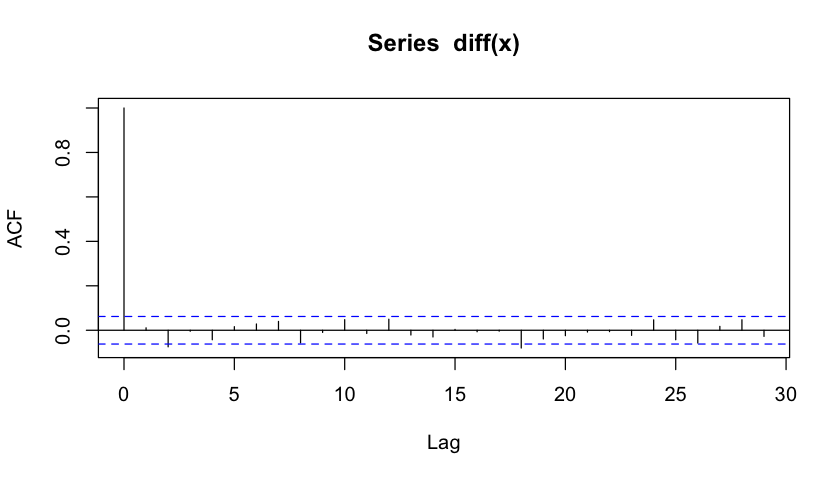

In [50]:
acf(diff(x))

Check unemployment rate to see if it has random walk pattern

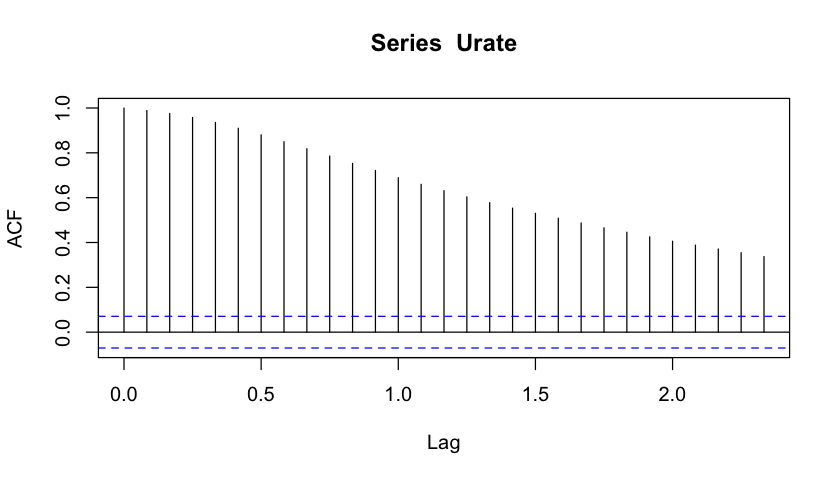

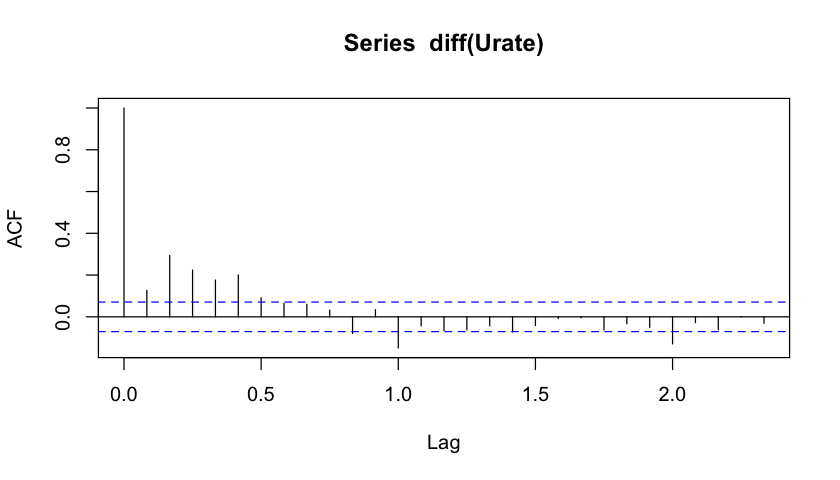

In [51]:
acf(Urate)
acf(diff(Urate))

Since the bars exceed from blue lines at 1.0 and 2.0, so it seems that this TS has annual seasonal component.(Anniversary effect) 

Also, Correlation is significant till first half year. 

----

Stationary AutoRegressive process

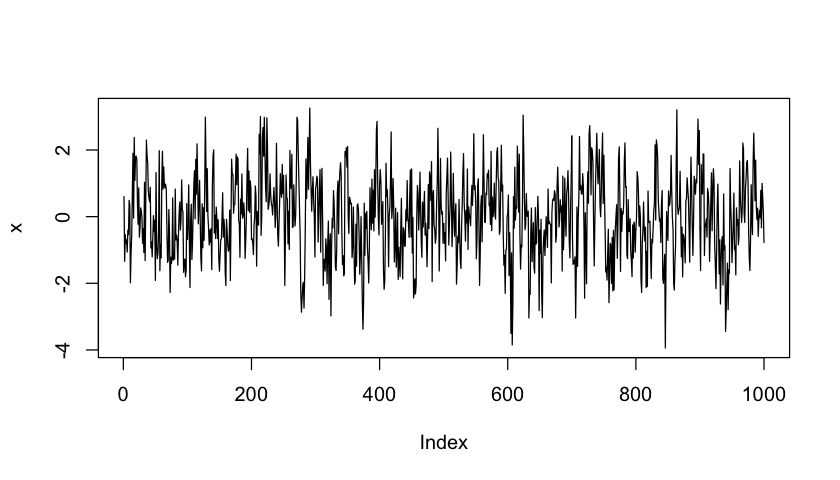

In [52]:
x = w = rnorm(1000)
#This is also a random function, but it has a tendency to move towards centre. 
for (t in 2:1000) x[t] = (x[t-1]/2 + w[t])
plot(x, type="l")

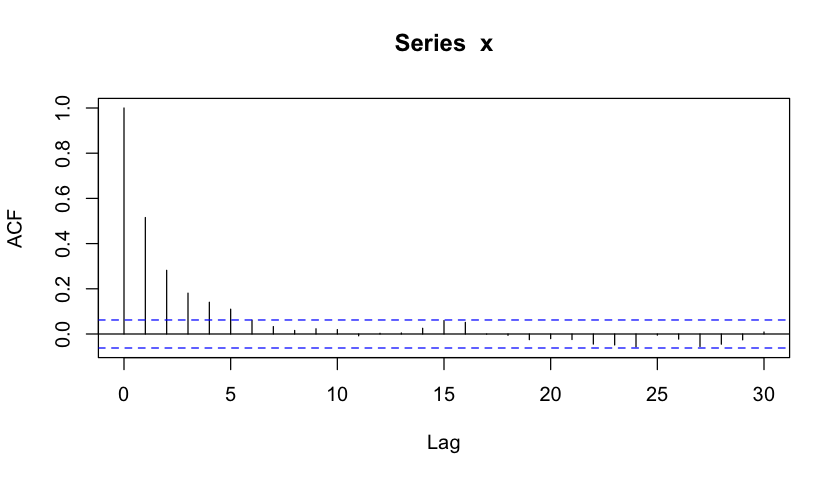

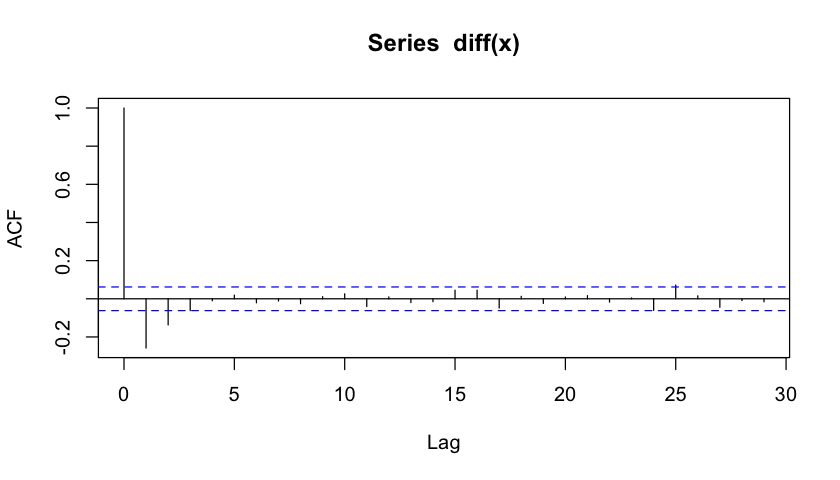

In [53]:
acf(x)
acf(diff(x))

Inference - diff - over long periods, there is not co-relation, but in immediate short term we see the negative co-relation. So if it moves up, it has a tendency to move back to the centre. 

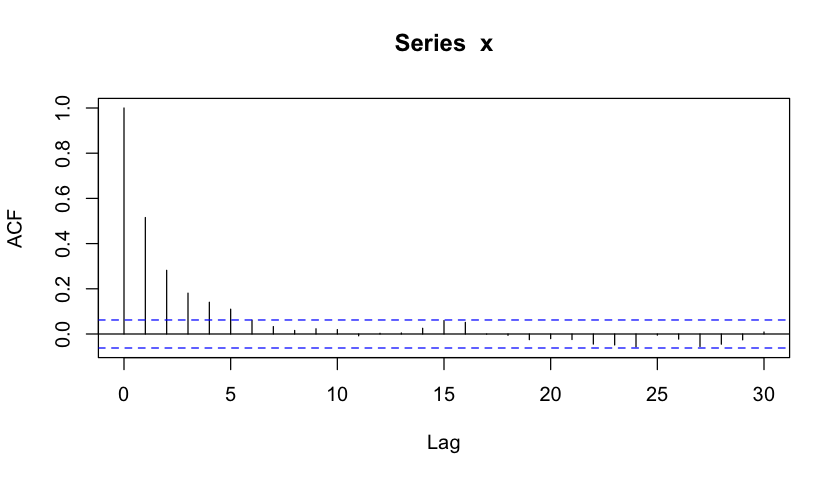

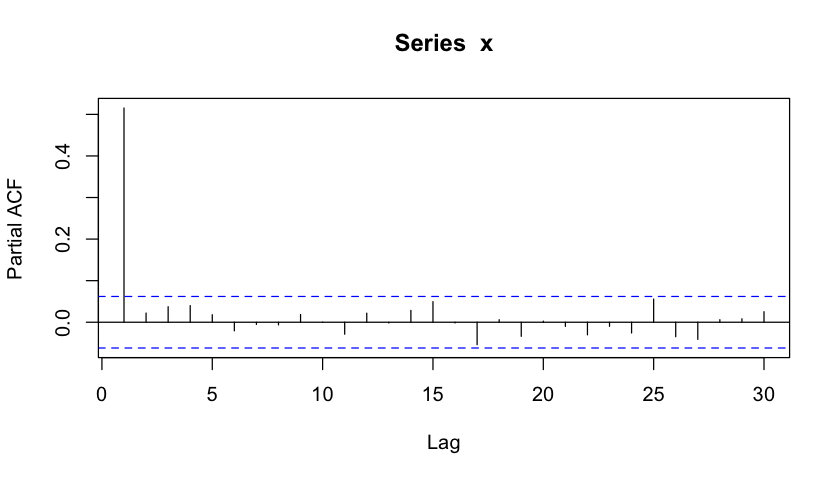

In [55]:
acf(x)
pacf(x) 
#Auto-corelation which takes into account previos period. 

acf shows more of ongoing effect. .. (refer to video again later for more inferences)

### [Time Series in R Session 1.5 (Regression)](https://www.youtube.com/watch?v=8HbFJN-0Ii0)

#### autoregression model

autoregression assigns co-efficients to teh lag periods to explain the contribution of each period to the current value of the data. 

In [56]:
U.ar = ar(Urate, method = "mle") #max. likelyhood explanation
x.ar = ar(x, method = "mle") # x - stationary auto regressive process

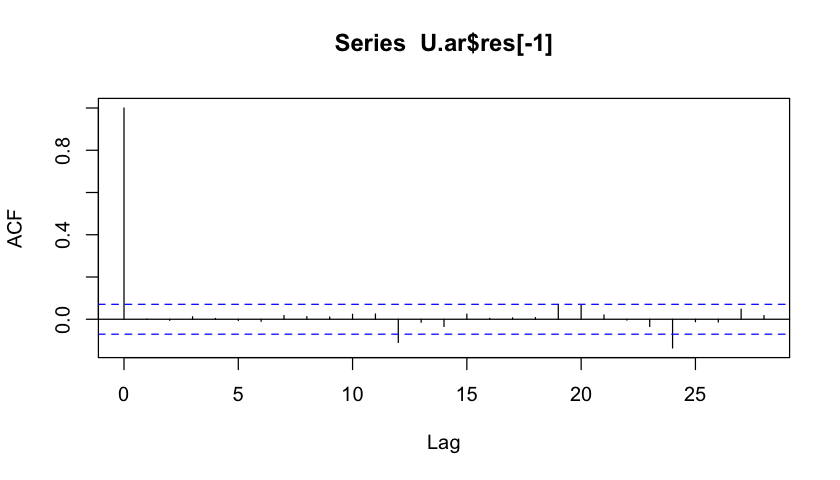

In [59]:
# find acf of residuals
acf(U.ar$res[-1], na.action = na.pass)

Residuals should not show a strong pattern.There is still a seasonal effect at 12 and 24 months. 

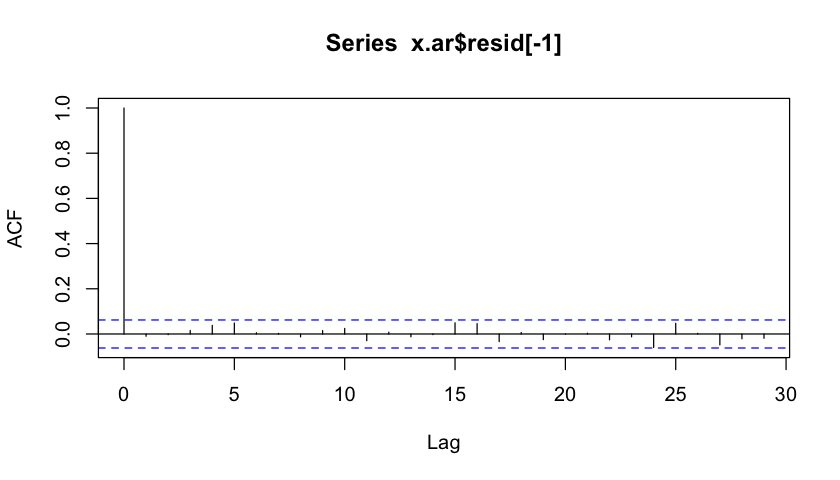

In [60]:
acf(x.ar$resid[-1])

In [64]:
U.ar


Call:
ar(x = Urate, method = "mle")

Coefficients:
      1        2        3        4        5        6        7        8        9       10       11  
 1.0018   0.2179  -0.0725  -0.0643   0.0349  -0.1261  -0.0323   0.0466  -0.0160  -0.1198   0.1154  

Order selected 11  sigma^2 estimated as  0.03839

It just calculates the residuals of the previous time periods. It stops once it thinks that the previous time periods have no significant impact on current values

In [65]:
summary(U.ar)

             Length Class  Mode     
order          1    -none- numeric  
ar            11    -none- numeric  
var.pred       1    -none- numeric  
x.mean         1    -none- numeric  
aic           13    -none- numeric  
n.used         1    -none- numeric  
order.max      1    -none- numeric  
partialacf     0    -none- NULL     
resid        769    ts     numeric  
method         1    -none- character
series         1    -none- character
frequency      1    -none- numeric  
call           3    -none- call     
asy.var.coef 121    -none- numeric  

Straight regression over time 

In [66]:
Urate.reg = lm(Urate ~ time(Urate))

In [67]:
summary(Urate.reg)


Call:
lm(formula = Urate ~ time(Urate))

Residuals:
   Min     1Q Median     3Q    Max 
-2.629 -1.134 -0.205  1.087  4.936 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -58.463234   5.971862   -9.79   <2e-16 ***
time(Urate)   0.032442   0.003016   10.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.547 on 767 degrees of freedom
Multiple R-squared:  0.1311,	Adjusted R-squared:   0.13 
F-statistic: 115.7 on 1 and 767 DF,  p-value: < 2.2e-16


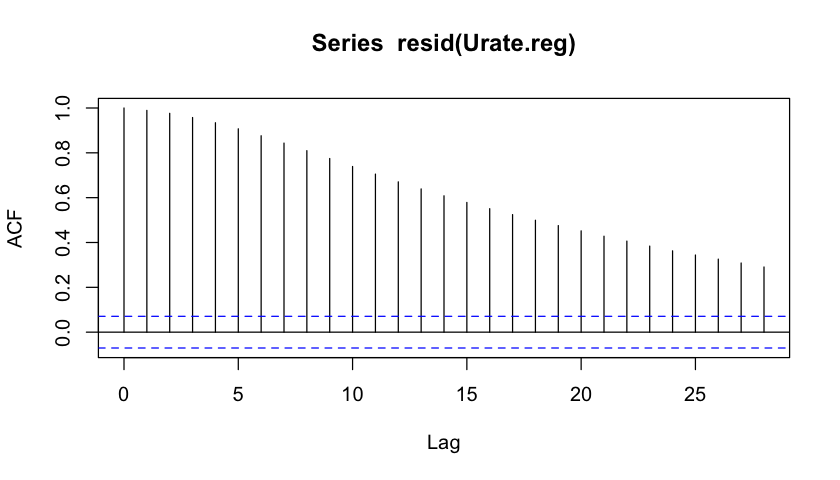

In [68]:
acf(resid(Urate.reg))

This (above) shows that the residuals have a lot of effect. 

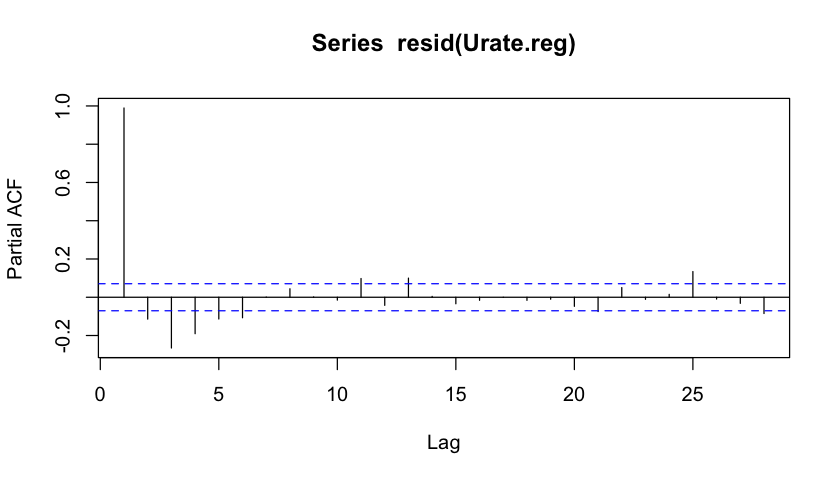

In [69]:
pacf(resid(Urate.reg))

Partial correlation shows that the effect is concentrated in initial few months.

In [70]:
AP.reg = lm(AP ~ time(AP))

In [71]:
summary(AP.reg)


Call:
lm(formula = AP ~ time(AP))

Residuals:
    Min      1Q  Median      3Q     Max 
-93.858 -30.727  -5.757  24.489 164.999 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -62055.907   2166.077  -28.65   <2e-16 ***
time(AP)        31.886      1.108   28.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.06 on 142 degrees of freedom
Multiple R-squared:  0.8536,	Adjusted R-squared:  0.8526 
F-statistic: 828.2 on 1 and 142 DF,  p-value: < 2.2e-16


Linear model explains 85% of variance in data

In [72]:
confint(AP.reg) # Confidence interval

,2.5 %,97.5 %
(Intercept),-66337.83,-57773.98
time(AP),29.69592,34.07649


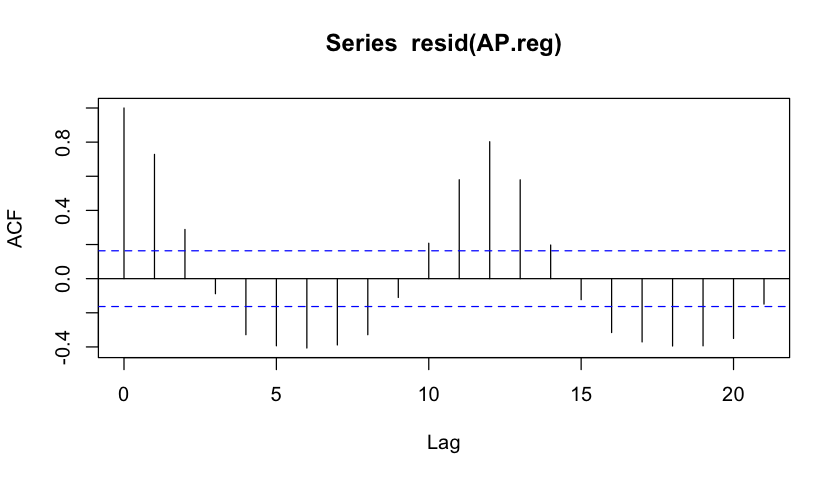

In [73]:
acf(resid(AP.reg))

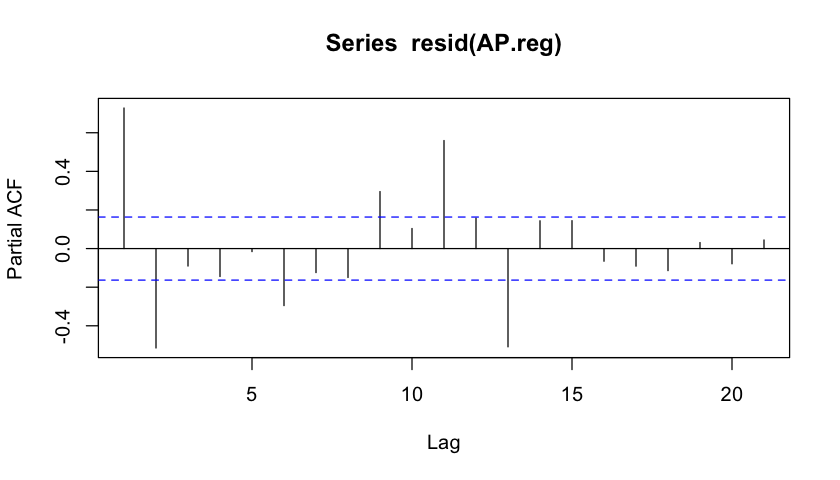

In [74]:
pacf(resid(AP.reg))

### [Time Series in R Session 1.6 (Stationary and Non-Stationary Models)](https://www.youtube.com/watch?v=ga85Ci4VAus)

ARIMA - Autoregressive Integrated Moving Average. 

1- Moving average Model MA(3)

In [78]:
AP.ma = arima(AP, order = c(0,0,3))

# Estimates moving average of three time periods of "white noise".

In [81]:
AP.ma  # aic is the important metric


Call:
arima(x = AP, order = c(0, 0, 3))

Coefficients:
         ma1     ma2     ma3  intercept
      1.4711  1.4972  0.9440   279.9826
s.e.  0.0336  0.0516  0.0441    14.2203

sigma^2 estimated as 1232:  log likelihood = -721.78,  aic = 1453.56

#### `ARMA(1,1)`

Integrates auto-regression with moving average

In [87]:
AP.arma = arima(AP, order = c(1,0,1))
# 1 prior period of AP, 1 prior period of white noise

In [88]:
AP.arma


Call:
arima(x = AP, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.9373  0.4264   281.5426
s.e.  0.0302  0.0911    53.6135

sigma^2 estimated as 968.5:  log likelihood = -700.87,  aic = 1409.75

#### ARIMA(2,1,2)

In [89]:
AP.arima = arima(AP, order=c(2,1,2))

# this model is composed of 2 prior periods of AP, 2 prior periods of white noise and first order difference. 

In [90]:
AP.arima


Call:
arima(x = AP, order = c(2, 1, 2))

Coefficients:
         ar1     ar2      ma1      ma2
      0.3517  0.1887  -0.0806  -0.7218
s.e.  0.1543  0.1501   0.1216   0.1143

sigma^2 estimated as 887.2:  log likelihood = -688.7,  aic = 1387.41

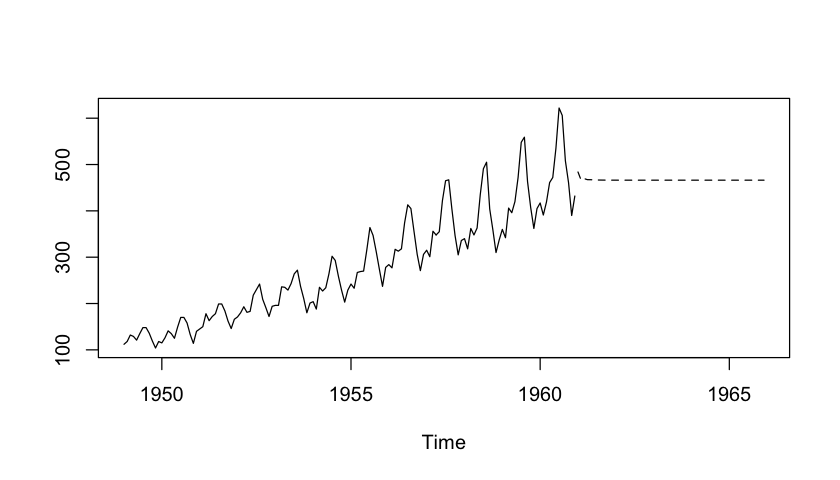

In [91]:
AP.predict = predict(AP.arima, n.ahead = 60)
ts.plot(AP, AP.predict$pred, lty=1:2)

### GARCH - Generalized autoregressive conditioned  heteroskedastic

heteroskedastic - variance of model may change over time. 

In [92]:
library(tseries)

In [93]:
garch(AP, grad = "numerical")


 ***** ESTIMATION WITH NUMERICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.295273e+04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1  1.024e+03
     1    2  8.735e+02  1.47e-01  1.66e+00  3.8e-05  1.7e+03  1.0e+00  1.42e+03
     2    4  8.718e+02  2.02e-03  1.19e-03  1.7e-06  2.1e+00  5.0e-02  5.02e-01
     3    6  8.691e+02  3.01e-03  2.99e-03  3.3e-06  1.9e+00  1.0e-01  9.54e-03
     4    8  8.688e+02  4.44e-04  4.44e-04  6.5e-07  9.7e+00  2.0e-02  2.62e-03
     5   10  8.681e+02  7.29e-04  7.29e-04  1.3e-06  2.0e+00  4.0e-02  1.64e-03
     6   12  8.680e+02  1.20e-04  1.20e-04  2.6e-07  1.6e+01  8.0e-03  1.03e-03
     7   14  8.678e+02  2.15e-04  2.15e-04  5.3e-07  2.7e+00  1.6e-02  1.08e-03
     8   16  8.678e+02  3.89e-05  3.89e-05  1.1e-07  3.0e+01  3.2e-03  9.73e-04
     9   19  8.678e+02  7.64e-07  7.64e-07  2.1e-09  


Call:
garch(x = AP, grad = "numerical")

Coefficient(s):
       a0         a1         b1  
1.295e+04  9.153e-01  5.534e-11  
